In [89]:
import mlrun
import warnings
warnings.filterwarnings("ignore")

# Set project name & path
project_name = 'lab9-new-2'
project_path = './'

print(f"Loading project '{project_name}' from '{project_path}'...")

# Load or create the project
project = mlrun.get_or_create_project(
    name=project_name,
    context=project_path,
    user_project=True
)

print(f"Project '{project.name}' loaded.")

Loading project 'lab9-new-2' from './'...
> 2025-04-10 10:54:53,126 [info] Loading project from path: {"path":"./","project_name":"lab9-new-2","user_project":true}
> 2025-04-10 10:54:53,163 [warning] Project name mismatch, lab9-new-1-jovyan != lab9-new-2-jovyan, project is loaded from lab9-new-1-jovyan project yaml. To prevent/allow this, you can take one of the following actions:
1. Set the `allow_cross_project=True` when loading the project.
2. Delete the existing project yaml, or ensure its name is equal to lab9-new-2-jovyan.
3. Use different project context dir.
> 2025-04-10 10:54:53,243 [info] Project loaded successfully: {"path":"./","project_name":"lab9-new-2-jovyan","stored_in_db":true}
Project 'lab9-new-2-jovyan' loaded.


In [90]:
project.set_function(
    'Data_prep.py',
    name='data_prep',
    kind='job',
    image='mlrun/mlrun',
    handler='fetch_data'
)
print("- Registered function: data_prep")

- Registered function: data_prep


In [91]:
project.set_function(
    'trainer.py',
    name='train',
    kind='job',
    image='mlrun/mlrun',
    handler='train_model'
)
print("- Registered function: train")


- Registered function: train


In [92]:
project.set_function(
    'serving.py',
    name='serving',
    kind='serving',
    image='mlrun/mlrun'
)
print("- Registered function: serving")


- Registered function: serving


In [93]:
project.set_workflow(
    name='main_workflow',
    workflow_path='workflow.py'
)
print("\nWorkflow 'main_workflow' registered successfully.")


Workflow 'main_workflow' registered successfully.


> 2025-04-10 10:54:55,221 [warning] it is recommended to use k8s secret (specify secret_name), specifying the aws_access_key/aws_secret_key directly is unsafe
> 2025-04-10 10:54:55,248 [warning] it is recommended to use k8s secret (specify secret_name), specifying the aws_access_key/aws_secret_key directly is unsafe
> 2025-04-10 10:54:55,253 [warning] it is recommended to use k8s secret (specify secret_name), specifying the aws_access_key/aws_secret_key directly is unsafe
> 2025-04-10 10:54:56,008 [info] Pipeline submitted successfully: {"id":"13851079-aab2-4717-9862-0beeadf4f4b2","pipeline_name":"lab9-new-2-jovyan-lab9-run-1 2025-04-10 10-54-55"}
> 2025-04-10 10:54:56,009 [info] Pipeline run id=13851079-aab2-4717-9862-0beeadf4f4b2, check UI for progress


> 2025-04-10 10:54:56,136 [info] Started run workflow lab9-new-2-jovyan-lab9-run-1 with run id = '13851079-aab2-4717-9862-0beeadf4f4b2' by kfp engine
> 2025-04-10 10:54:56,137 [info] Waiting for pipeline run completion: {"project":"lab9-new-2-jovyan","run_id":"13851079-aab2-4717-9862-0beeadf4f4b2"}


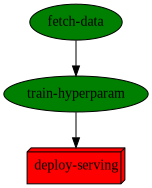

uid,start,state,kind,name,parameters,results
...6c72e7b6,Apr 10 10:55:41,completed,run,train-hyperparam,label_column=targettest_size=0.1model_name=cancer_rf_model,
...f2d3d6bc,Apr 10 10:55:10,completed,run,fetch-data,,


RuntimeError: Pipeline run status Failed

In [94]:
run = project.run(
    name='lab9-run-1',               
    workflow_path='workflow.py',   
    arguments={},                  
    watch=True                     
)

In [ ]:
# Get the trained model path from the run
model_path = run.outputs['model']

# Load serving function object
serving_fn = project.get_function('serving')

# Attach the model
serving_fn.add_model(
    key='cancer_rf_model',
    model_path=model_path
)

# Now deploy
project.deploy_function('serving')
